In [1]:
from ast import literal_eval
from itertools import chain
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# recipeNLG

In [2]:
recipe_nlg_path = "/mnt/d/recipe-data-extraction/data/recipeNLG.csv"
df = pd.read_csv(recipe_nlg_path)
df.head()

Unnamed: 0                  title  \
0           0    No-Bake Nut Cookies   
1           1  Jewell Ball'S Chicken   
2           2            Creamy Corn   
3           3          Chicken Funny   
4           4   Reeses Cups(Candy)     

                                         ingredients  \
0  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  ["1 small jar chipped beef, cut up", "4 boned ...   
2  ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...   
3  ["1 large whole chicken", "2 (10 1/2 oz.) cans...   
4  ["1 c. peanut butter", "3/4 c. graham cracker ...   

                                          directions  \
0  ["In a heavy 2-quart saucepan, mix brown sugar...   
1  ["Place chipped beef on bottom of baking dish....   
2  ["In a slow cooker, combine all ingredients. C...   
3  ["Boil and debone chicken.", "Put bite size pi...   
4  ["Combine first four ingredients and press in ...   

                                              link    source  \
0   www.cookbooks.com/Recipe-Details.aspx?id=44874  Gathered   
1  www.cookbooks.com/Recipe-Details.aspx?id=699419  Gathered   
2   www.cookbooks.com/Recipe-Details.aspx?id=10570  Gathered   
3  www.cookbooks.com/Recipe-Details.aspx?id=897570  Gathered   
4  www.cookbooks.com/Recipe-Details.aspx?id=659239  Gathered   

                                                 NER  
0  ["brown sugar", "milk", "vanilla", "nuts", "bu...  
1  ["beef", "chicken breasts", "cream of mushroom...  
2  ["frozen corn", "cream cheese", "butter", "gar...  
3  ["chicken", "chicken gravy", "cream of mushroo...  
4  ["peanut butter", "graham cracker crumbs", "bu...

In [95]:
len(df)

2231142

In [96]:
recipe_nlg_ner_path = "/mnt/d/recipe-data-extraction/data/recipe_nlg_ner.pkl"
with open(recipe_nlg_ner_path, 'rb') as f:
    recipe_nlg_ner = pickle.load(f)

In [98]:
recipe_nlg_ner_df = pd.DataFrame(list(chain(*list(chain(*recipe_nlg_ner)))))
recipe_nlg_ner_df.head()

entity_group     score         word  start  end
0     QUANTITY  0.999889            1      0    1
1         UNIT  0.992597            c      2    3
2        STATE  0.822600         pack     12   16
3         NAME  0.999537  brown sugar     19   30
4     QUANTITY  0.999900          1/2      0    3

In [100]:
recipe_nlg_ner_df.word.value_counts()

1                                     2340345
c.                                    1801491
2                                      988832
tsp.                                   915241
1/2                                    826723
                                       ...   
French style onions                         1
ring beans                                  1
onion soup mix mixed                        1
Valley original salad dressing mix          1
almond Hershey candy bars                   1
Name: word, Length: 82558, dtype: int64

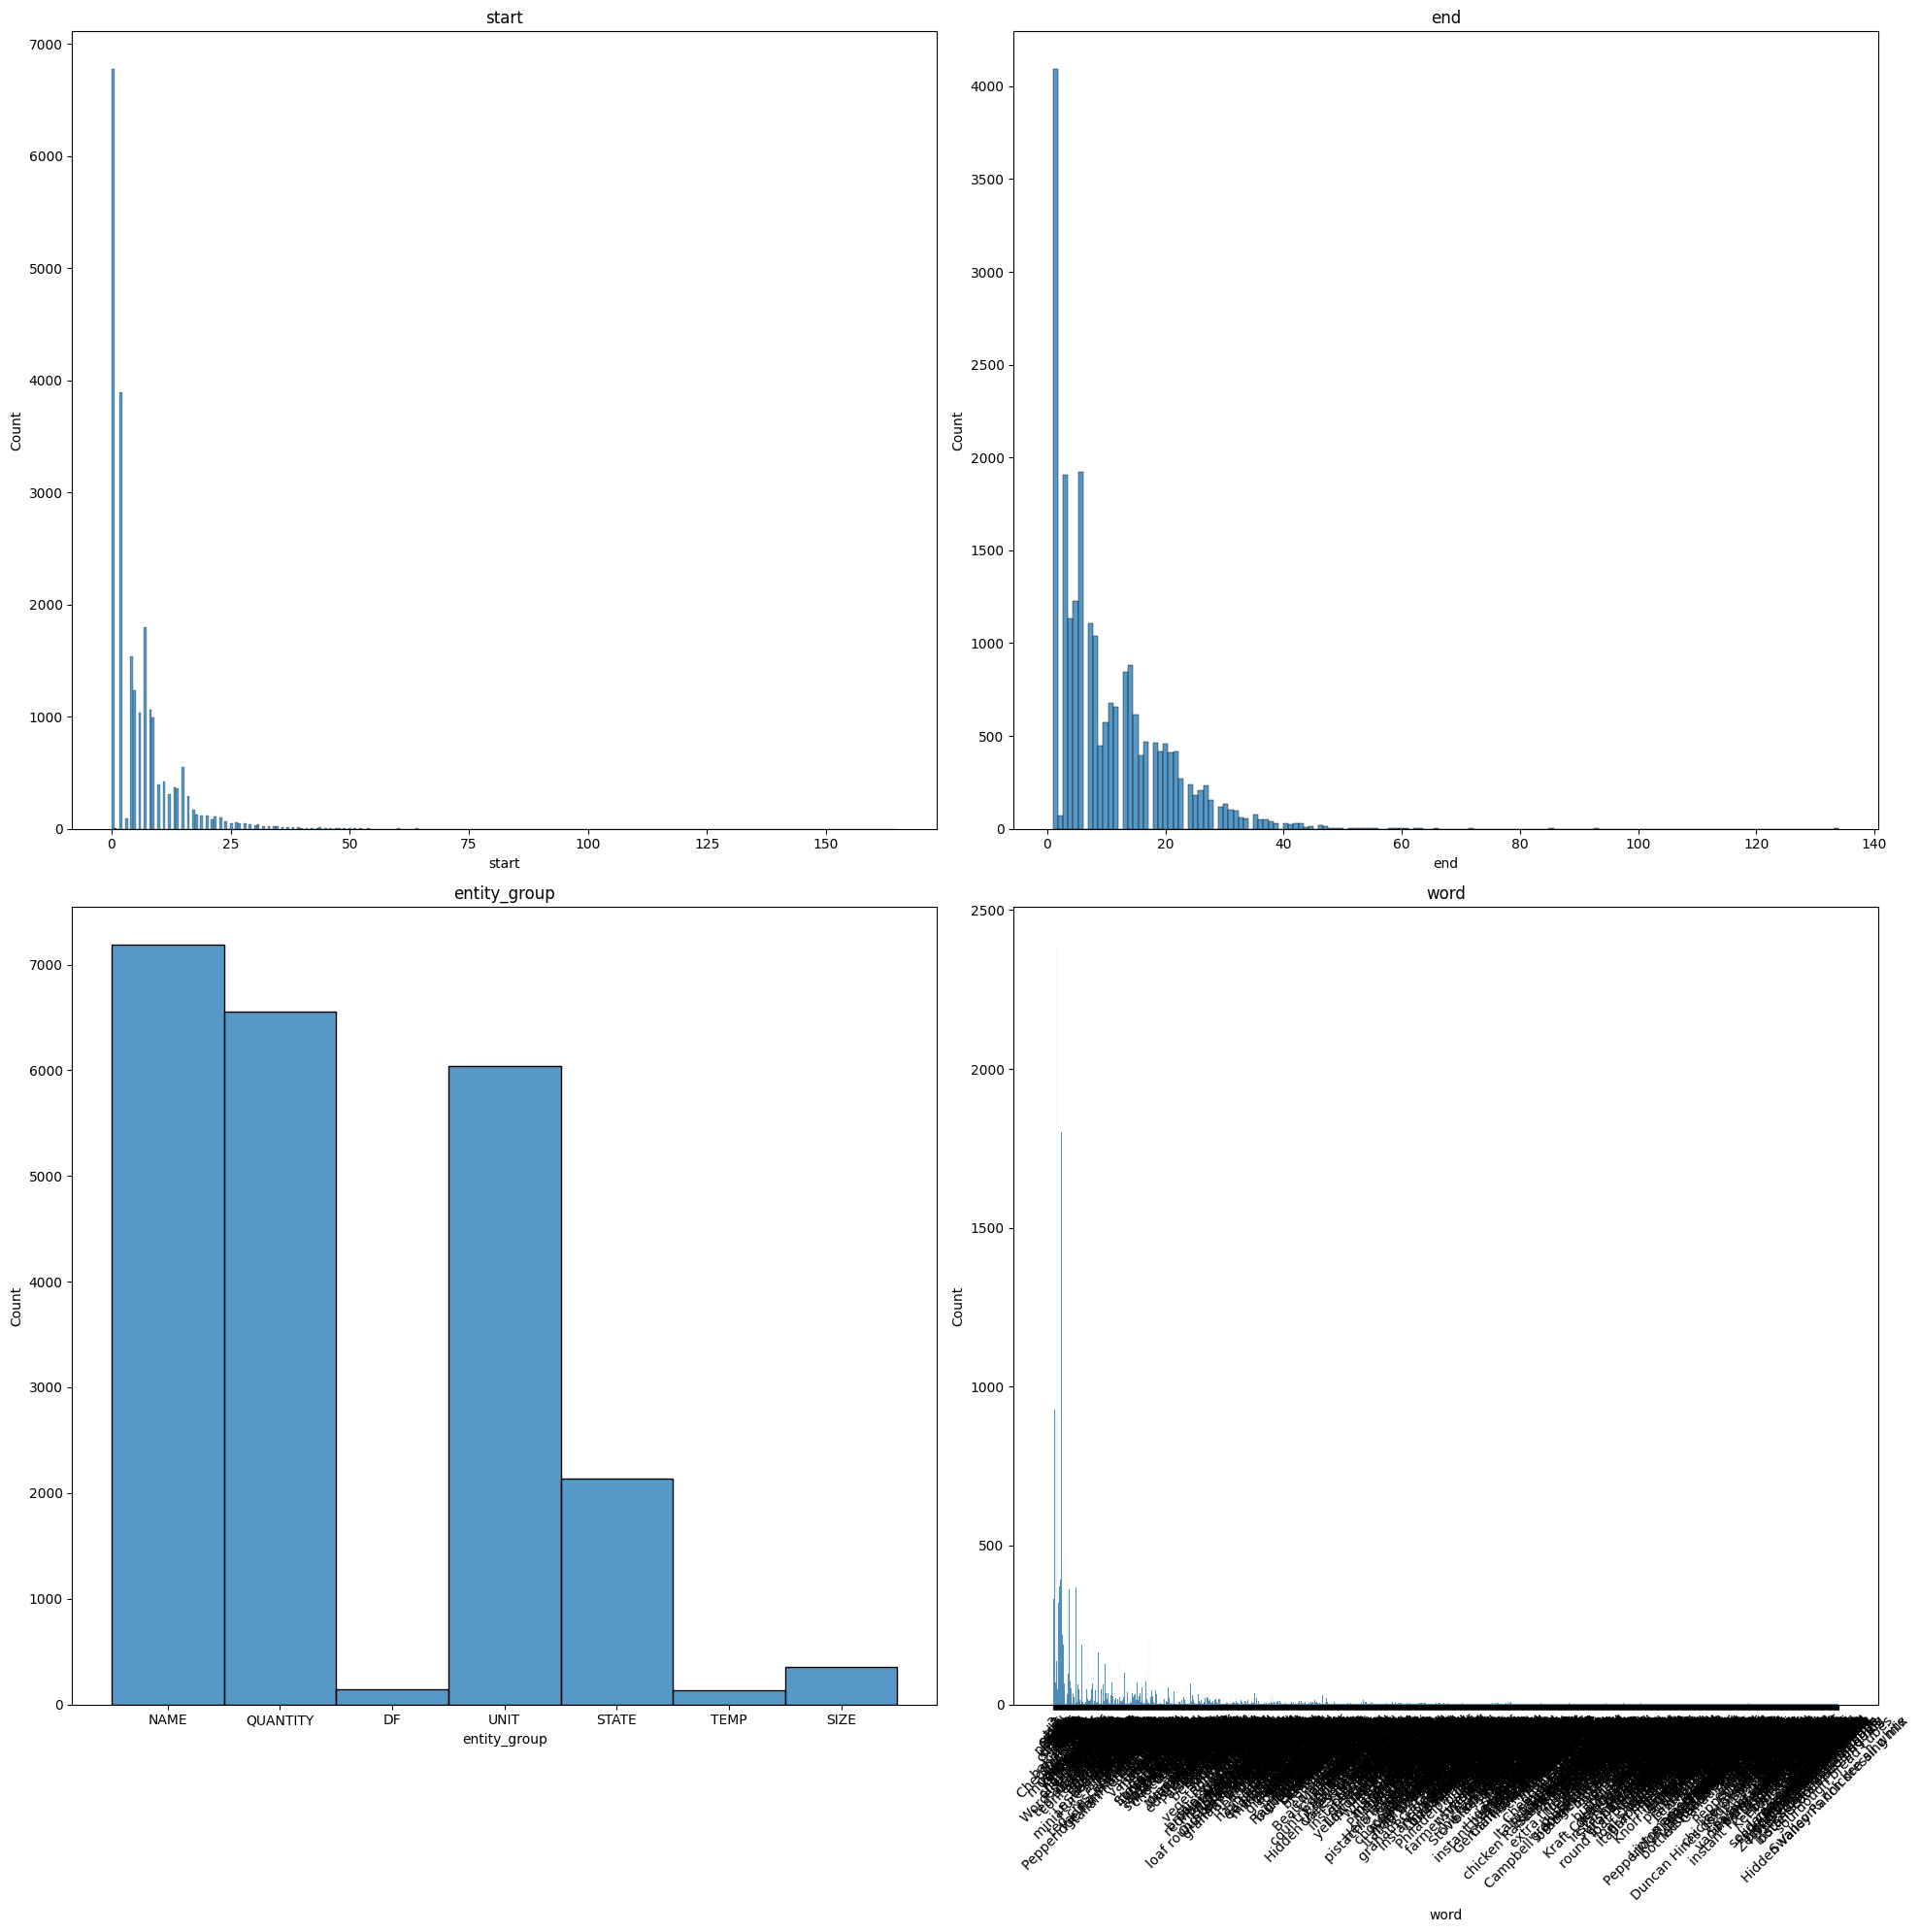

In [104]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
for i, col in enumerate(('start', 'end', 'entity_group', 'word')):
    nrow = i // 2
    ncol = i % 2
    ax = axs[nrow, ncol]
    plt.xticks(rotation=45)
    sns.histplot(x=col, data=recipe_nlg_ner_df.sample(frac=1e-3), ax=ax)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

In [3]:
def show_wordcloud_recipe_nlg(column):
    comment_words = ''
    stopwords = set(STOPWORDS)

    for val in column:  
        val = " ".join(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

### Word Cloud for ingredients

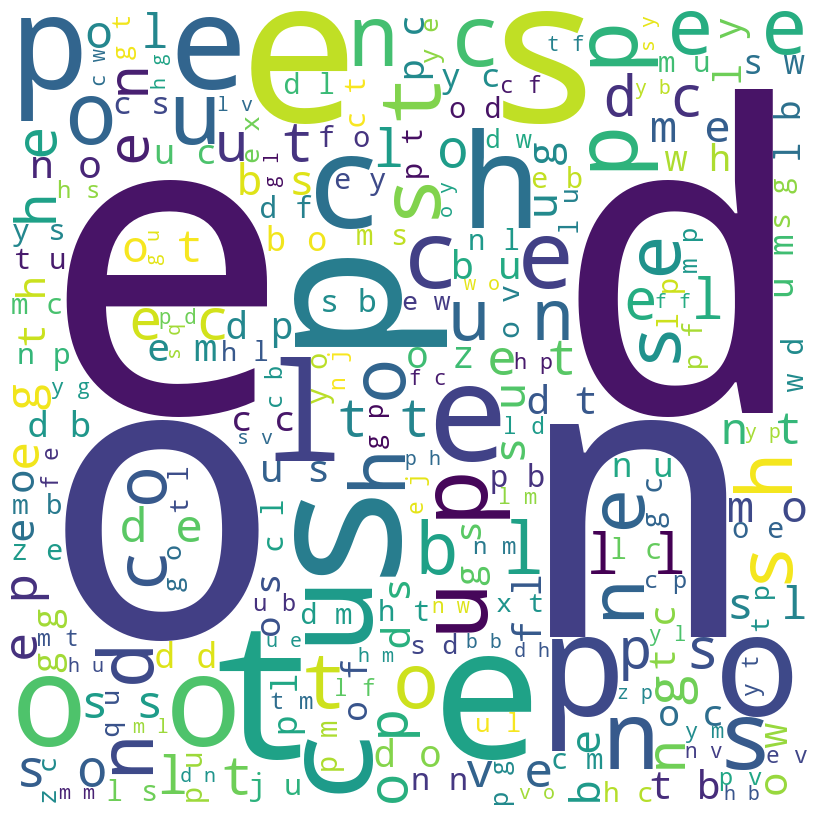

In [4]:
show_wordcloud_recipe_nlg(df.ingredients.sample(frac=1e-2))

### Word Cloud for directions

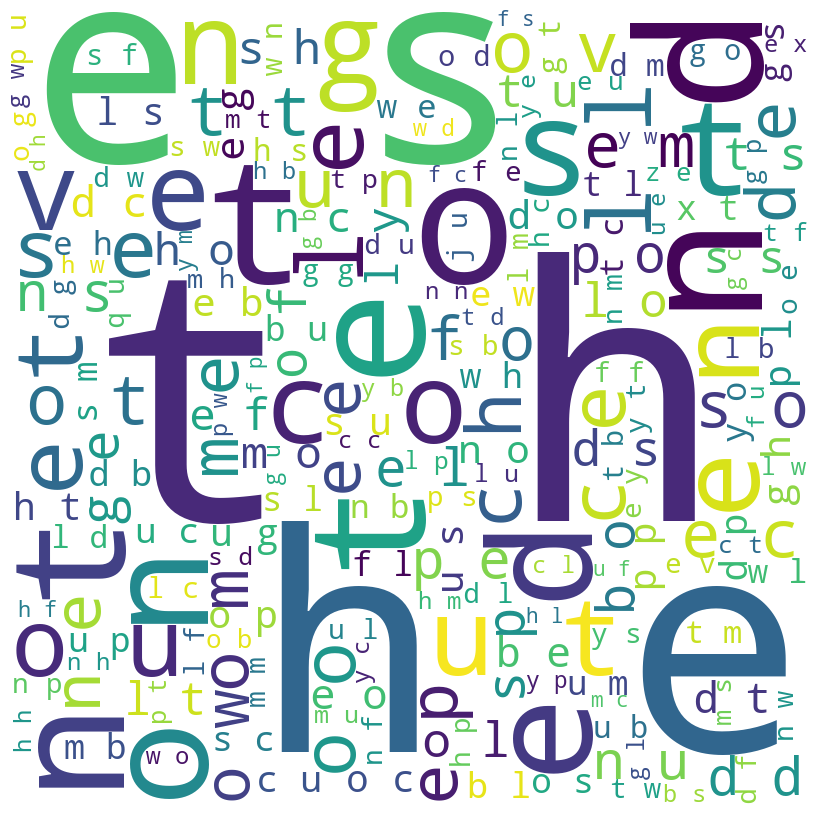

In [5]:
show_wordcloud_recipe_nlg(df.directions.sample(frac=1e-2))

# TASTEset

In [2]:
taste_set_path = "/mnt/d/recipe-data-extraction/data/TASTEset.csv"
df = pd.read_csv(taste_set_path)

In [4]:
df.head()

ingredients  \
0  5 ounces rum\n4 ounces triple sec\n3 ounces Ti...   
1  2 tubes cinnamon roll, refrigerated, with icin...   
2  4 ripe coconuts\n1 cup evaporated milk\n1 cup ...   
3  1 sheet graham cracker (broken in half)\n2 pie...   
4  1 (8 ounce) package crescent rolls\n8 slices d...   

                                ingredients_entities  
0  [{"start": 0, "end": 1, "type": "QUANTITY", "e...  
1  [{"start": 0, "end": 1, "type": "QUANTITY", "e...  
2  [{"start": 0, "end": 1, "type": "QUANTITY", "e...  
3  [{"start": 0, "end": 1, "type": "QUANTITY", "e...  
4  [{"start": 0, "end": 1, "type": "QUANTITY", "e...

In [5]:
df.values[0]

array(['5 ounces rum\n4 ounces triple sec\n3 ounces Tia Maria\n20 ounces orange juice\n',
       '[{"start": 0, "end": 1, "type": "QUANTITY", "entity": "5"},{"start": 2, "end": 8, "type": "UNIT", "entity": "ounces"},{"start": 9, "end": 12, "type": "FOOD", "entity": "rum"},{"start": 13, "end": 14, "type": "QUANTITY", "entity": "4"},{"start": 15, "end": 21, "type": "UNIT", "entity": "ounces"},{"start": 22, "end": 32, "type": "FOOD", "entity": "triple sec"},{"start": 33, "end": 34, "type": "QUANTITY", "entity": "3"},{"start": 35, "end": 41, "type": "UNIT", "entity": "ounces"},{"start": 42, "end": 51, "type": "FOOD", "entity": "Tia Maria"},{"start": 52, "end": 54, "type": "QUANTITY", "entity": "20"},{"start": 55, "end": 61, "type": "UNIT", "entity": "ounces"},{"start": 62, "end": 74, "type": "FOOD", "entity": "orange juice"}]'],
      dtype=object)

In [24]:
taste_set_entities = pd.DataFrame(list(chain(*df.ingredients_entities.apply(lambda x: literal_eval(x)))))
taste_set_entities.head()

start  end      type  entity
0      0    1  QUANTITY       5
1      2    8      UNIT  ounces
2      9   12      FOOD     rum
3     13   14  QUANTITY       4
4     15   21      UNIT  ounces

In [29]:
taste_set_entities.describe(include='all')

start           end   type entity
count   13362.000000  13362.000000  13362  13362
unique           NaN           NaN      9   1969
top              NaN           NaN   FOOD      1
freq             NaN           NaN   4020   1055
mean       79.235968     85.402784    NaN    NaN
std        62.166170     62.830919    NaN    NaN
min         0.000000      1.000000    NaN    NaN
25%        28.000000     35.000000    NaN    NaN
50%        70.000000     76.000000    NaN    NaN
75%       117.000000    124.000000    NaN    NaN
max       379.000000    386.000000    NaN    NaN

### Let's make some charts 

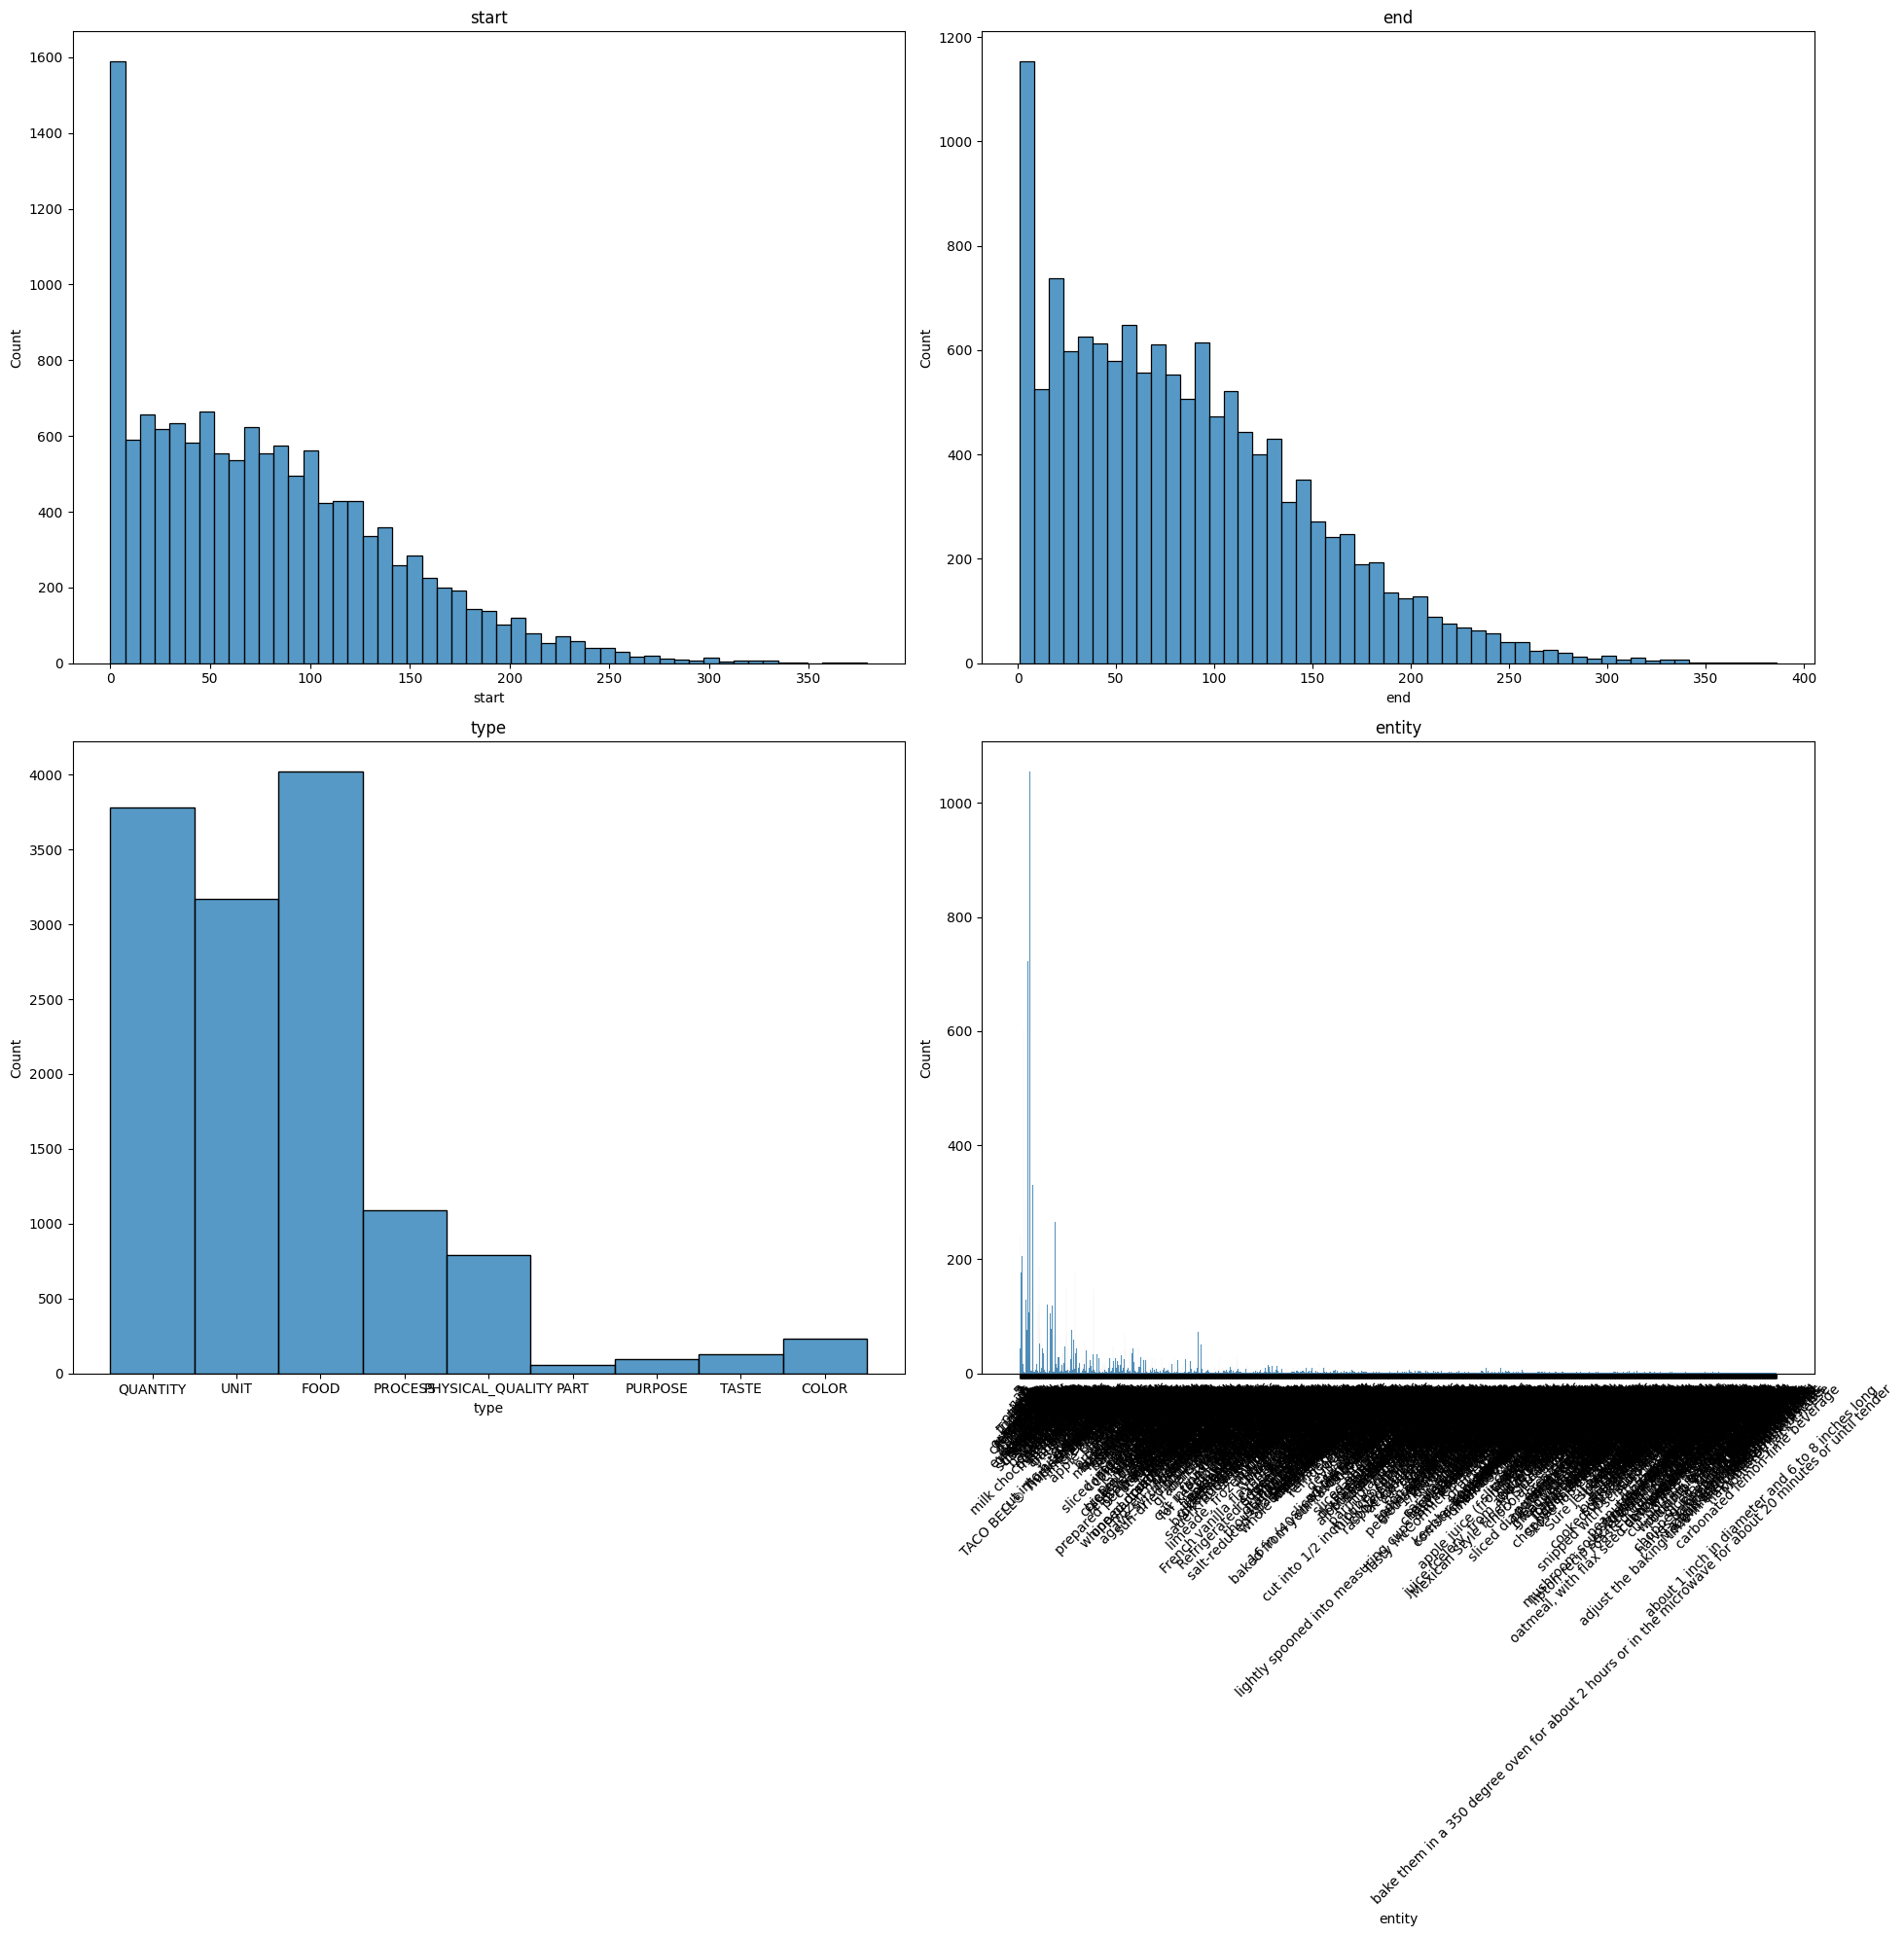

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
for i, col in enumerate(taste_set_entities.columns):
    nrow = i // 2
    ncol = i % 2
    ax = axs[nrow, ncol]
    plt.xticks(rotation=45)
    sns.histplot(x=col, data=taste_set_entities, ax=ax)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

In [41]:
taste_set_entities['entities_len'] = taste_set_entities.entity.apply(lambda x: len(x))

In [47]:
taste_set_entities.sort_values(by='entities_len', ascending=False).head()

start  end              type  \
9447      47  152           PROCESS   
4131     215  279           PROCESS   
9634     101  151              FOOD   
11270    107  157           PROCESS   
13025     46   93  PHYSICAL_QUALITY   

                                                  entity  entities_len  
9447   bake them in a 350 degree oven for about 2 hou...           105  
4131   lightly spooned into measuring cups and levele...            64  
9634   oatmeal, with flax seed and wheat bran combina...            50  
11270  adjust the baking time in the oven 5 mins. per...            50  
13025    about 1 inch in diameter and 6 to 8 inches long            47

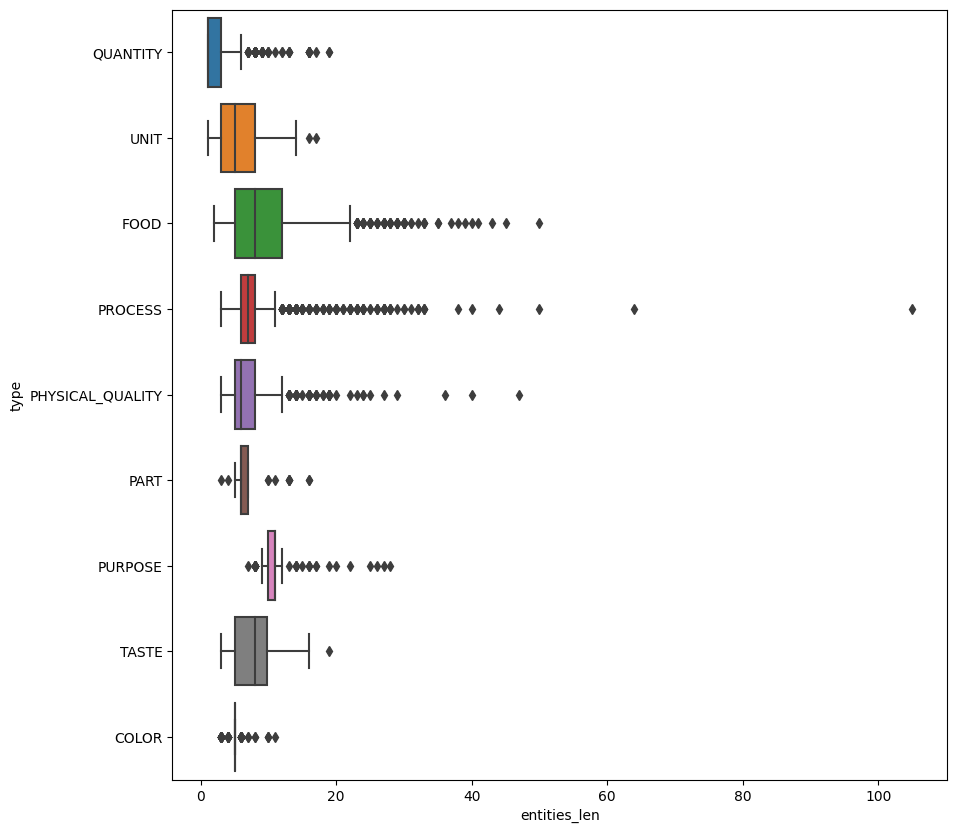

In [50]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='entities_len', y='type', data=taste_set_entities)
plt.show()

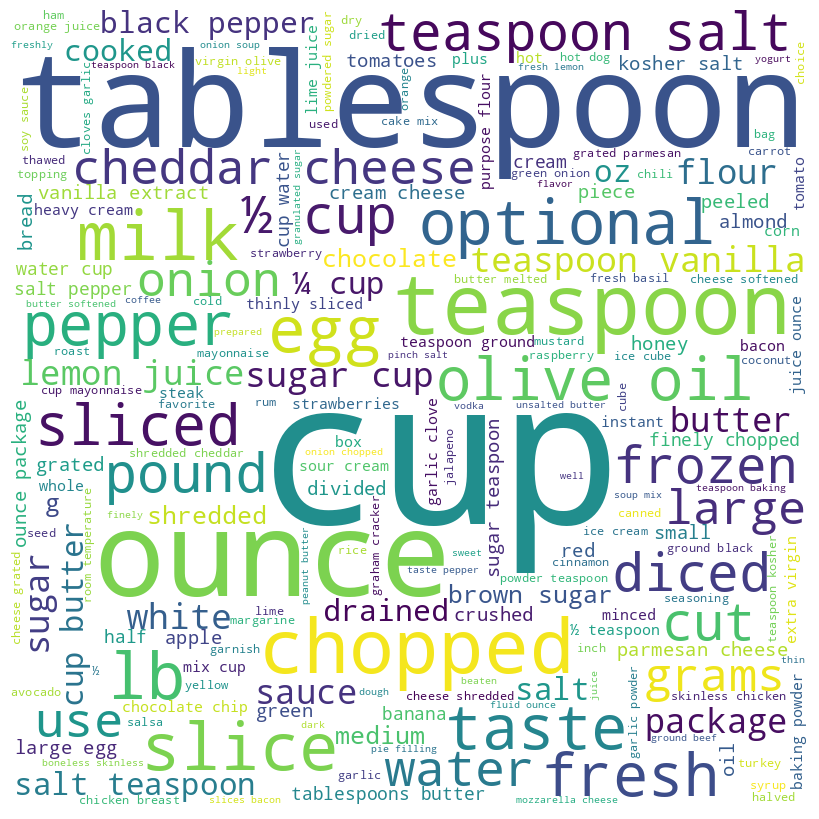

In [55]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.ingredients:  
    val = str(val)
    val = val.replace('\n', ' ')
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Food.com from kaggle

In [56]:
kaggle_path = "/mnt/d/recipe-data-extraction/data/recipes_w_search_terms.csv"
df = pd.read_csv(kaggle_path)
df.head()

id                                   name  \
0   96313            Grilled Garlic Cheese Grits   
1  232037  Simple Shrimp and Andouille Jambalaya   
2   41090             black-and-white bean salad   
3   60656             Crock Pot Italian Zucchini   
4  232047          Beef Stew With Dried Cherries   

                                         description  \
0  We love grits, this is another good way to ser...   
1  Simple, easy and very tasty for when you are i...   
2                                                NaN   
3  This is a good recipe for weight watchers. It ...   
4  This is a fabulous stew that came from one of ...   

                                         ingredients  \
0  ['water', 'grits', 'salt', 'cheddar cheese', '...   
1  ['onion', 'red bell pepper', 'garlic cloves', ...   
2  ['white beans', 'canned black beans', 'tomatoe...   
3  ['zucchini', 'yellow squash', 'diced tomatoes'...   
4  ['beef stew meat', 'flour', 'salt', 'allspice'...   

                                 ingredients_raw_str serving_size  servings  \
0  ["4   cups    water","1   cup   uncooked old f...    1 (155 g)         8   
1  ["1   medium    onion, chopped coarse ","1   m...    1 (366 g)         4   
2  ["1   cup   canned white beans, rinsed and dra...    1 (807 g)         1   
3  ["2       zucchini, sliced ","2   small    yel...    1 (244 g)         4   
4  ["3   lbs    beef stew meat","3   tablespoons ...    1 (358 g)         8   

                                               steps  \
0  ['I a sauce pan, bring water to a boil; slowly...   
1  ['In a food processor, pulse the onion, red pe...   
2  ['In a large bowl, combine beans, tomato, onio...   
3  ['Put all ingredients in the crock pot and coo...   
4  ['Preheat oven to 350°F.', "Cut beef into 1 in...   

                                                tags  \
0  ['time-to-make', 'course', 'main-ingredient', ...   
1  ['60-minutes-or-less', 'time-to-make', 'course...   
2  ['15-minutes-or-less', 'time-to-make', 'course...   
3  ['weeknight', 'time-to-make', 'course', 'main-...   
4  ['time-to-make', 'course', 'main-ingredient', ...   

                                        search_terms  
0  {'diabetic', 'low-calorie', 'vegetarian', 'low...  
1                               {'dinner', 'shrimp'}  
2  {'vegetarian', 'salad', 'side', 'dinner', 'veg...  
3                  {'side', 'vegetarian', 'italian'}  
4                                         {'dinner'}

In [57]:
len(df)

494963

### We analyze search terms and tags from this dataset

In [58]:
search_terms_path = "/mnt/d/recipe-data-extraction/data/ingredients_search_tags.csv"
search_terms = pd.read_csv(search_terms_path)
search_terms.head()

plant-based  sweet  seafood   meat  restricted_diet  \
0         True  False    False  False             True   
1        False  False     True  False            False   
2         True  False    False  False            False   
3         True  False    False  False            False   
4        False  False    False  False            False   

                                         ingredients  
0  4   cups    water. 1   cup   uncooked old fash...  
1  1   medium    onion, chopped coarse. 1   mediu...  
2  1   cup   canned white beans, rinsed and drain...  
3  2       zucchini, sliced. 2   small    yellow ...  
4  3   lbs    beef stew meat. 3   tablespoons    ...

In [59]:
len(search_terms)

494963

In [61]:
search_terms.dtypes

plant-based          bool
sweet                bool
seafood              bool
meat                 bool
restricted_diet      bool
ingredients        object
dtype: object

In [62]:
search_terms.describe(include=['bool'])

plant-based   sweet seafood    meat restricted_diet
count       494963  494963  494963  494963          494963
unique           2       2       2       2               2
top          False   False   False   False           False
freq        388230  375665  477580  424064          295270

In [72]:
def show_word_cloud_kaggle(df):
    comment_words = ''
    stopwords = set(STOPWORDS)

    for val in df.ingredients:  
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

### Word Cloud for a whole dataset

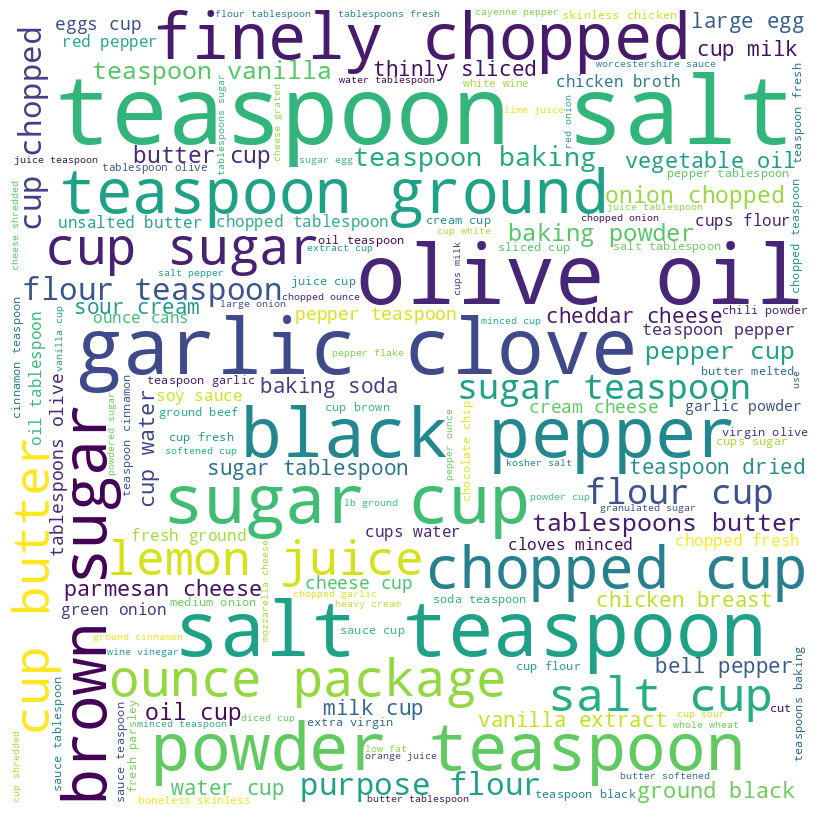

In [73]:
show_word_cloud_kaggle(search_terms)

### Word Cloud for plant-based 

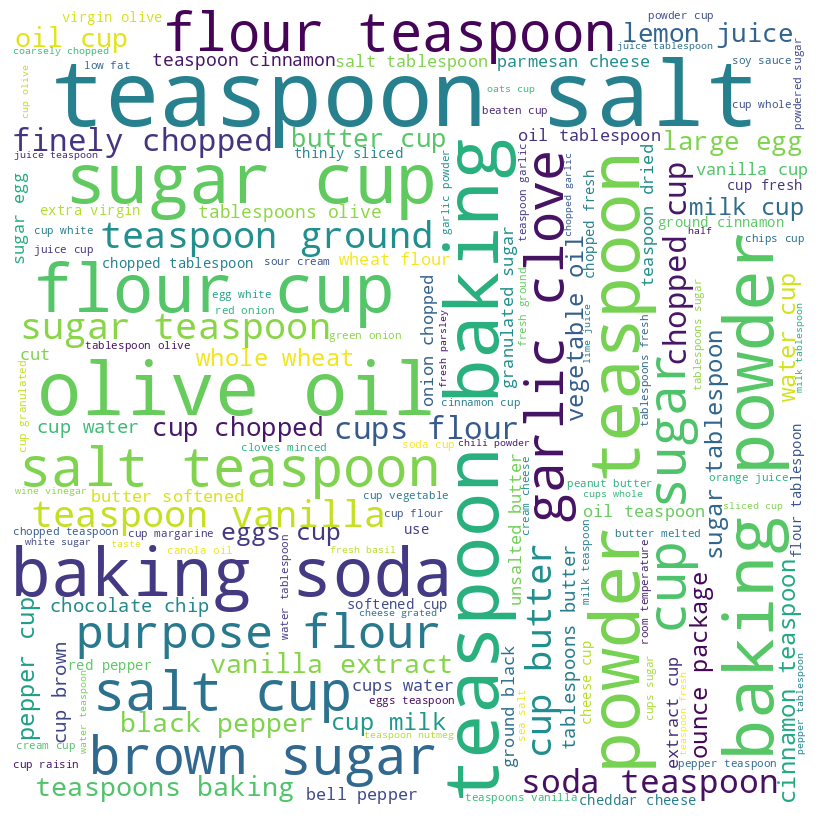

In [74]:
show_word_cloud_kaggle(search_terms[search_terms['plant-based']])

### Word Cloud for sweet

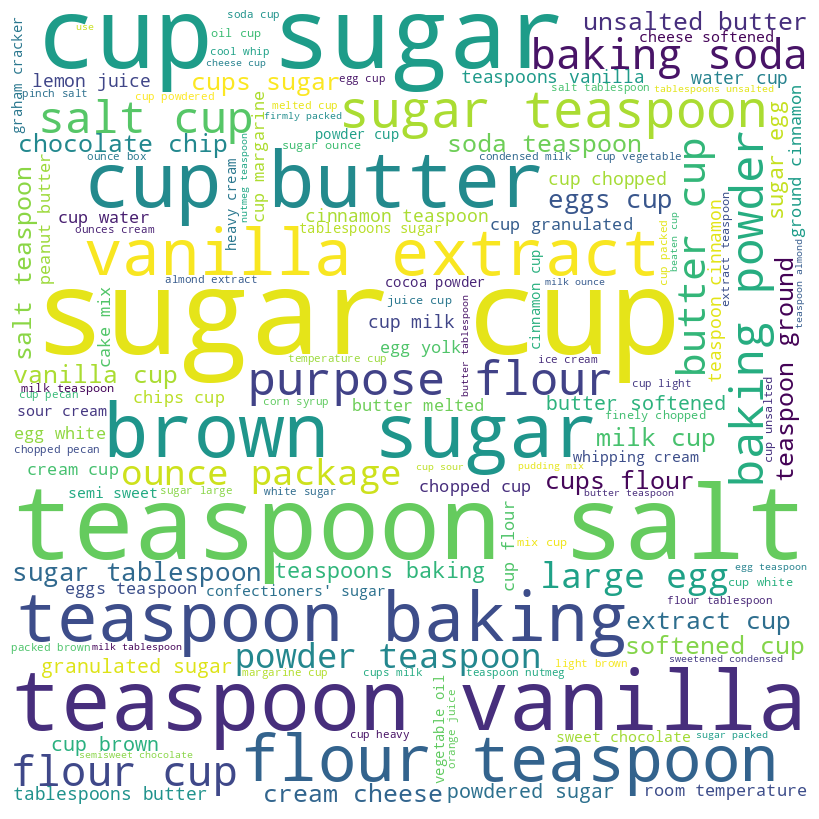

In [75]:
show_word_cloud_kaggle(search_terms[search_terms['sweet']])

### Word Cloud for seafood

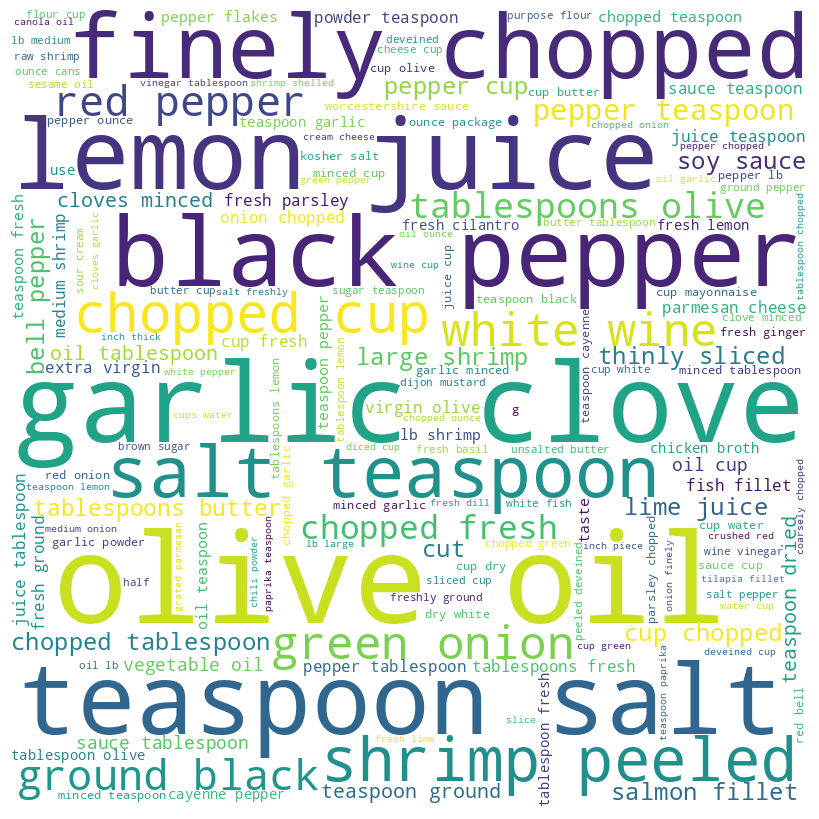

In [76]:
show_word_cloud_kaggle(search_terms[search_terms['seafood']])

### Word Cloud for meat

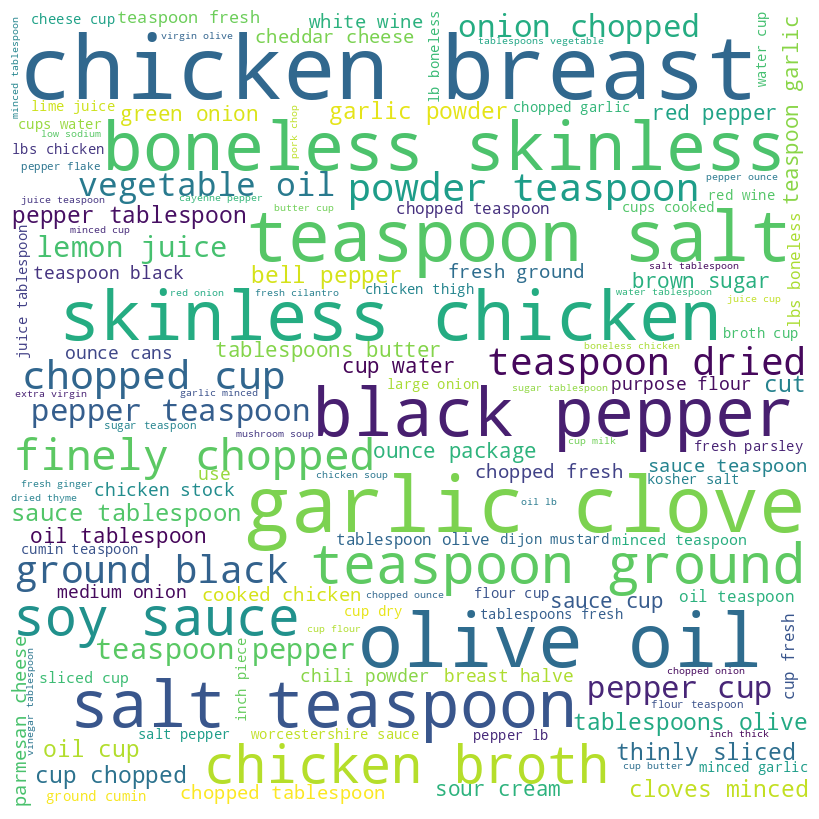

In [77]:
show_word_cloud_kaggle(search_terms[search_terms['meat']])

### Word Cloud for restricted_diet

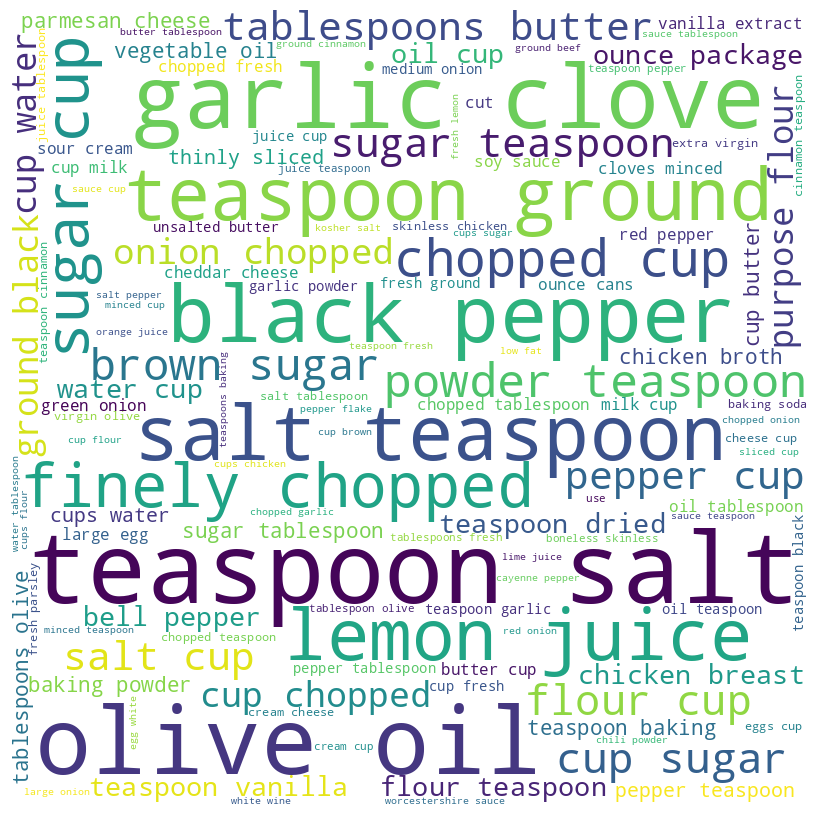

In [78]:
show_word_cloud_kaggle(search_terms[search_terms['restricted_diet']])

In [71]:
tags_path = "/mnt/d/recipe-data-extraction/data/ingredients_tags.csv"
tags = pd.read_csv(tags_path)
tags.head()

pork  nuts-grains   meat  gluten   fish  dairy  seafood  restrict diet  \
0  False         True  False   False  False   True    False           True   
1   True        False   True   False   True  False    False          False   
2  False        False  False   False  False  False    False           True   
3  False        False  False   False  False  False    False           True   
4  False        False   True   False  False  False    False          False   

     egg  shrimp                                        ingredients  
0  False   False  4   cups    water. 1   cup   uncooked old fash...  
1  False    True  1   medium    onion, chopped coarse. 1   mediu...  
2  False   False  1   cup   canned white beans, rinsed and drain...  
3  False   False  2       zucchini, sliced. 2   small    yellow ...  
4  False   False  3   lbs    beef stew meat. 3   tablespoons    ...

In [79]:
len(tags)

358120

In [80]:
tags.dtypes

pork               bool
nuts-grains        bool
meat               bool
gluten             bool
fish               bool
dairy              bool
seafood            bool
restrict diet      bool
egg                bool
shrimp             bool
ingredients      object
dtype: object

In [81]:
tags.describe(include=['bool'])

pork nuts-grains    meat  gluten    fish   dairy seafood  \
count   358120      358120  358120  358120  358120  358120  358120   
unique       2           2       2       2       2       2       2   
top      False       False   False   False   False   False   False   
freq    333761      333656  244116  332793  326763  322386  352688   

       restrict diet     egg  shrimp  
count         358120  358120  358120  
unique             2       1       2  
top             True   False   False  
freq          243951  358120  349255

### Word Cloud for pork

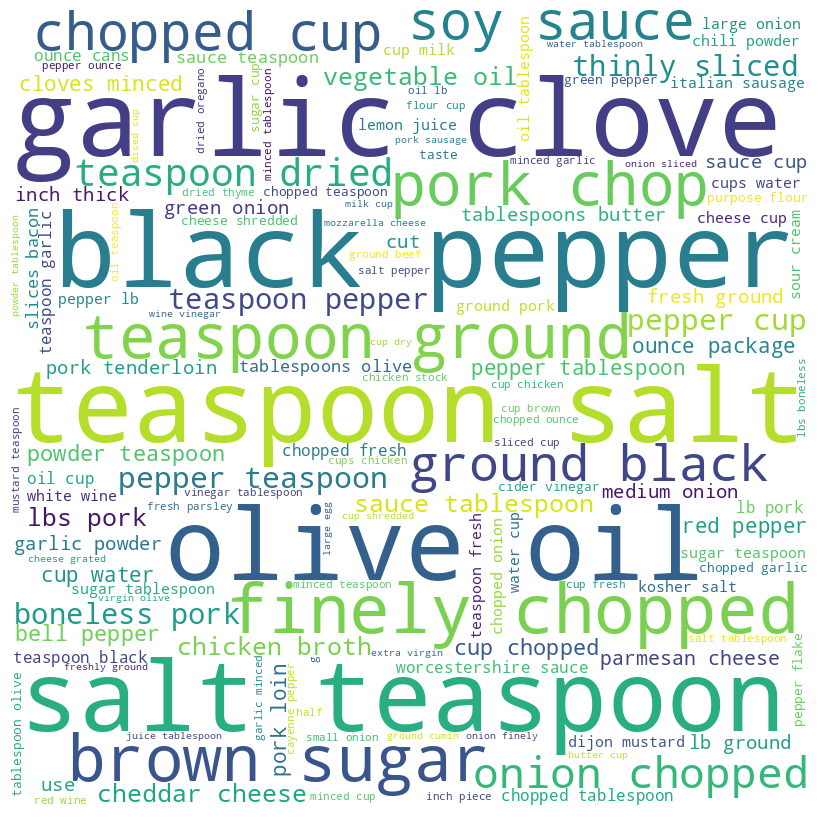

In [82]:
show_word_cloud_kaggle(tags[tags['pork']])

### Word Cloud for nuts-grains

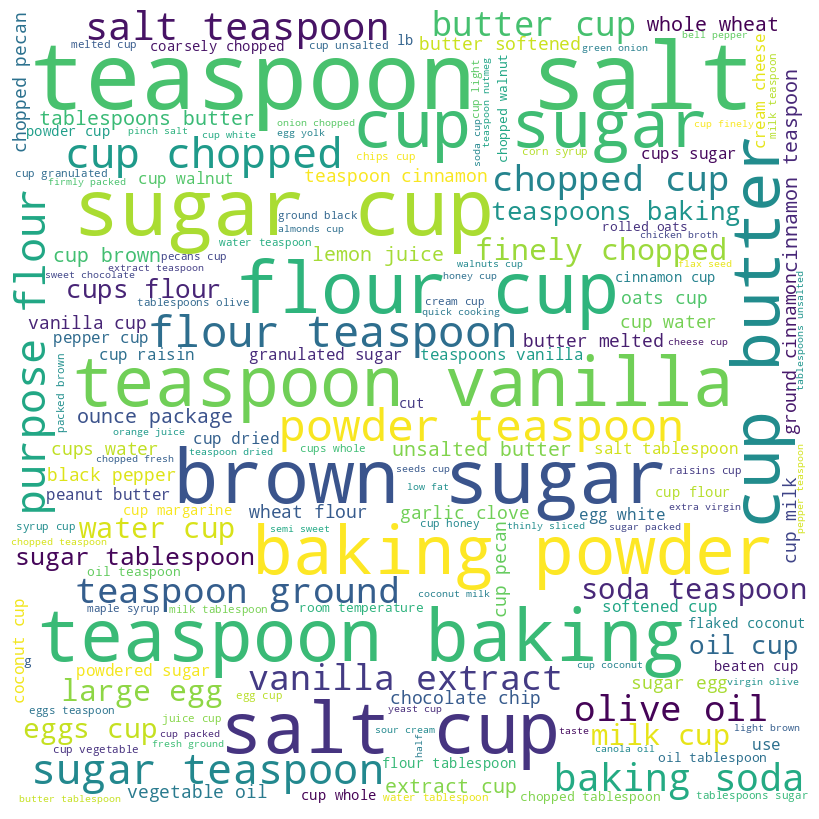

In [83]:
show_word_cloud_kaggle(tags[tags['nuts-grains']])

### Word Cloud for meat

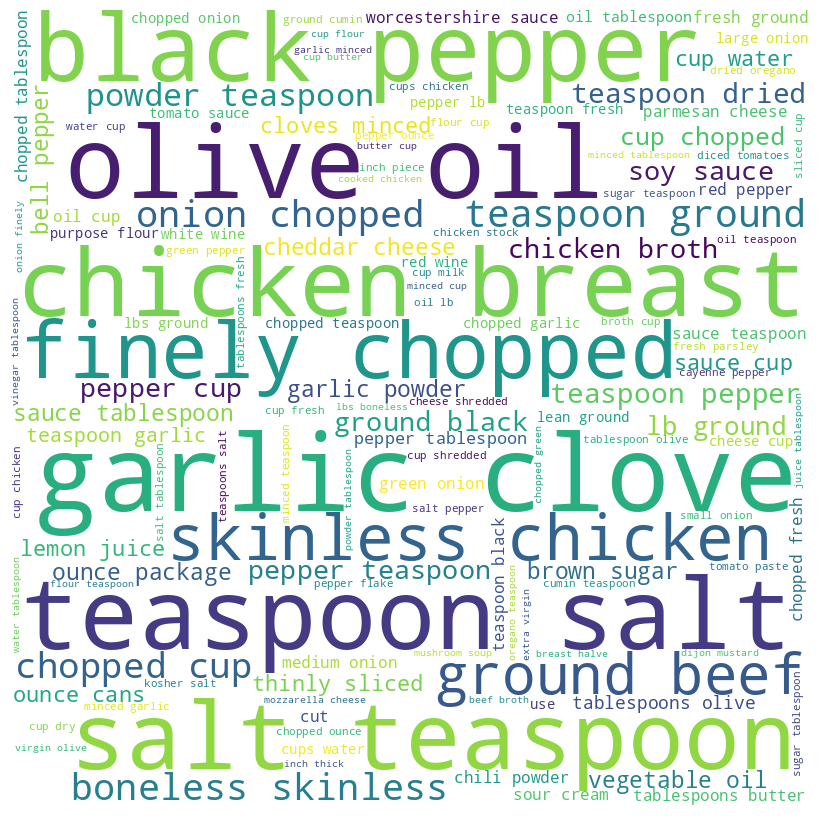

In [84]:
show_word_cloud_kaggle(tags[tags['meat']])

### Word Cloud for gluten

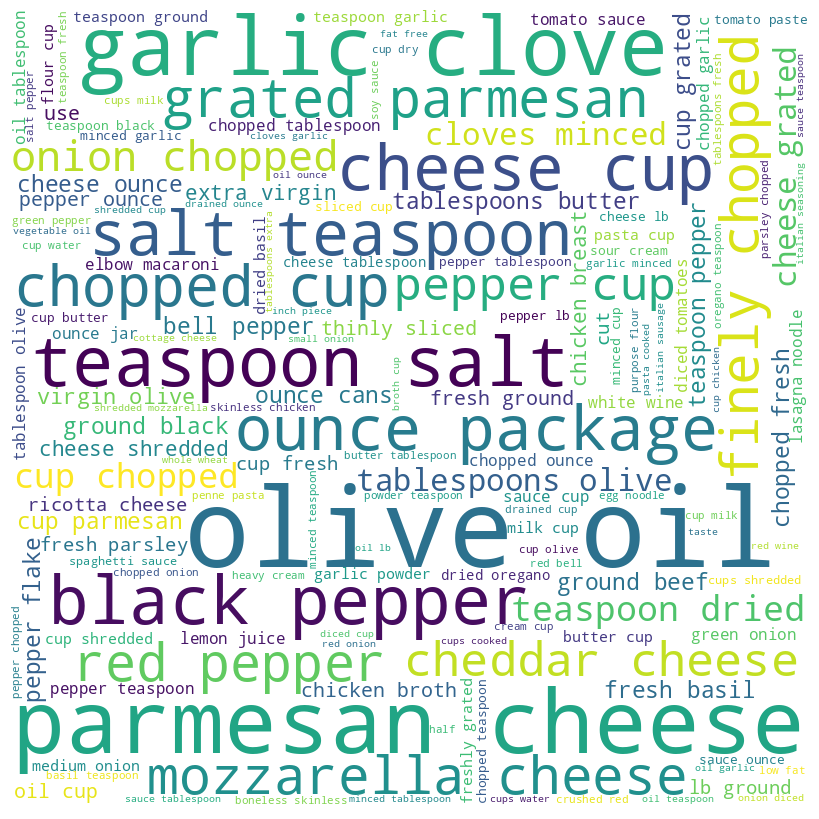

In [85]:
show_word_cloud_kaggle(tags[tags['gluten']])

### Word Cloud for fish

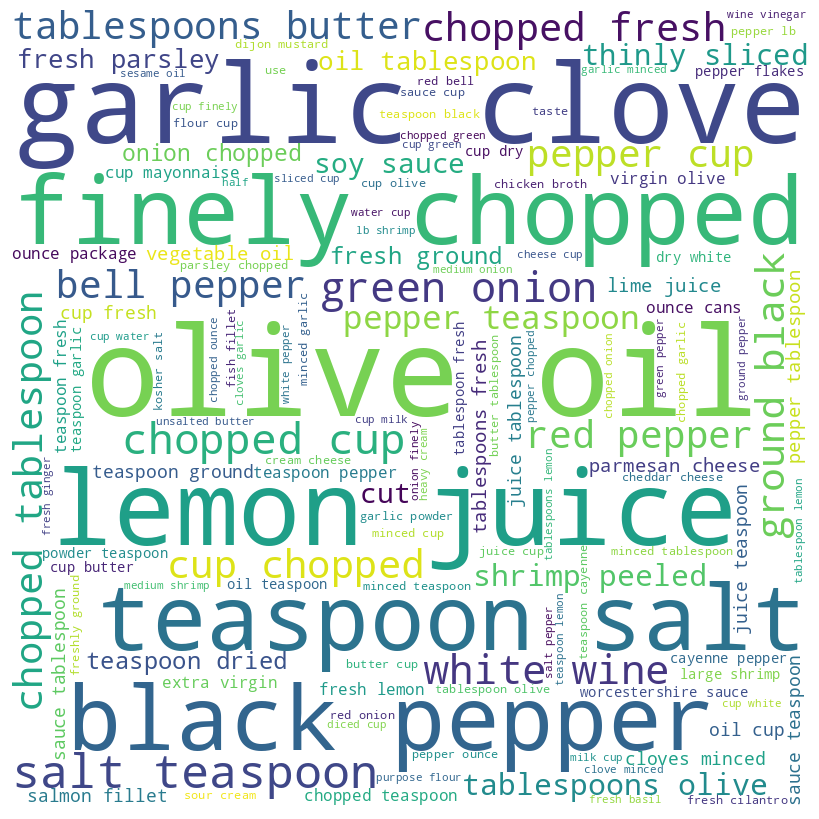

In [86]:
show_word_cloud_kaggle(tags[tags['fish']])

### Word Cloud for dairy

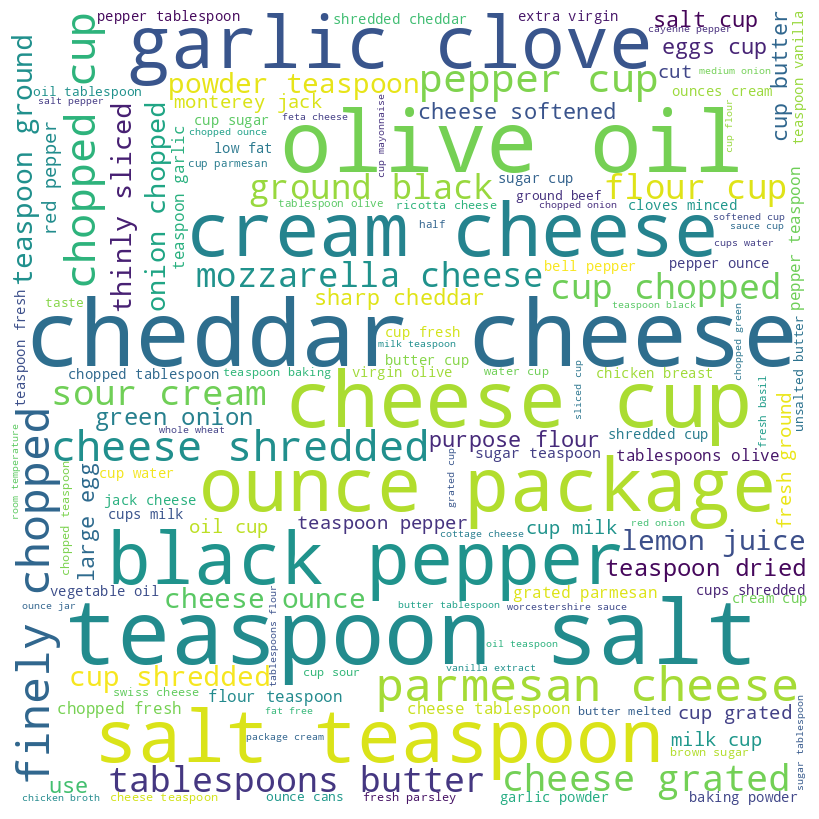

In [87]:
show_word_cloud_kaggle(tags[tags['dairy']])

### Word Cloud for seafood

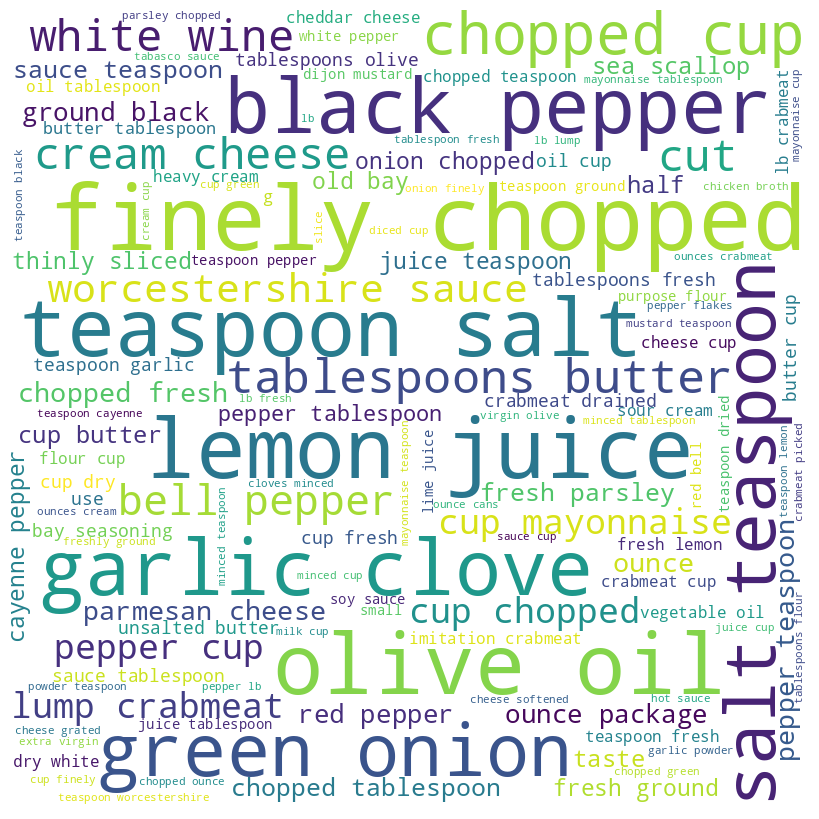

In [90]:
show_word_cloud_kaggle(tags[tags['seafood']])

### Word Cloud for restrict diet

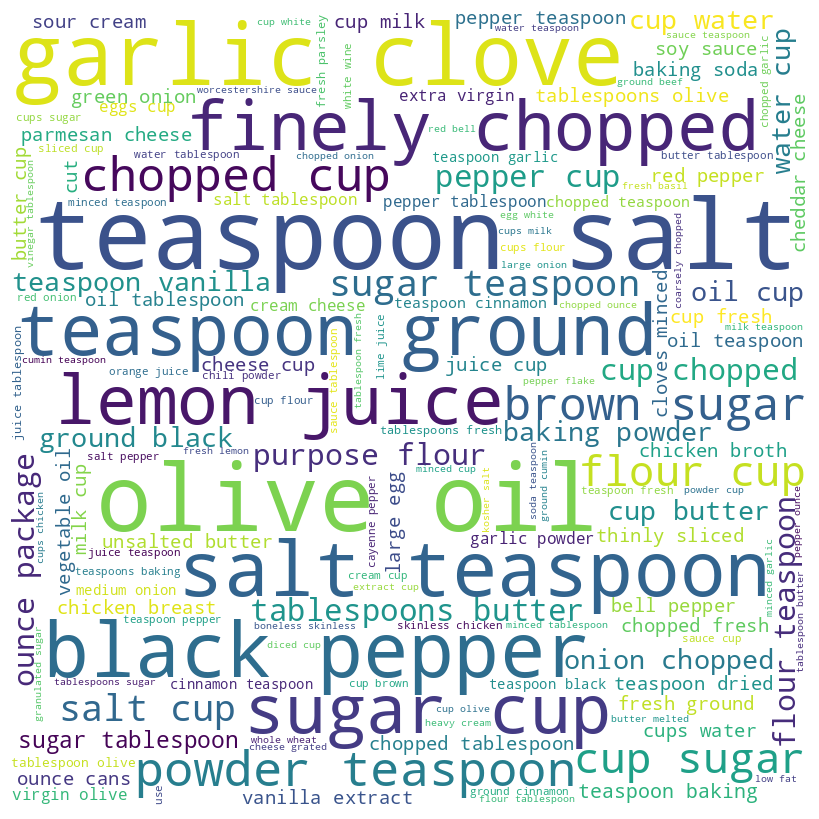

In [91]:
show_word_cloud_kaggle(tags[tags['restrict diet']])

### Word Cloud for shrimp

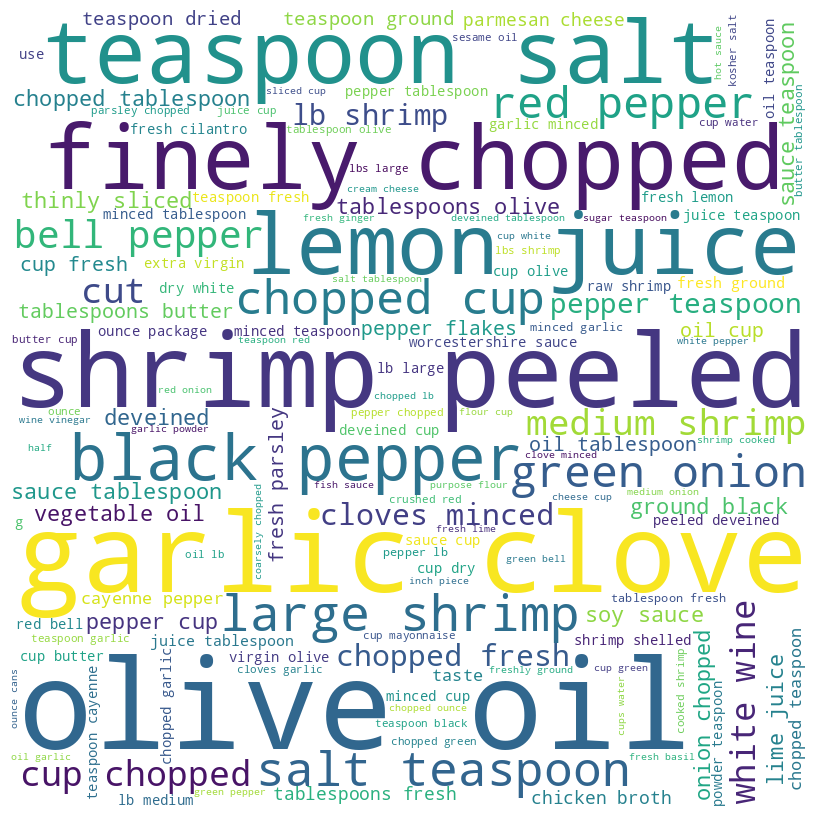

In [92]:
show_word_cloud_kaggle(tags[tags['shrimp']])